## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merger_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merger_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_cnt = len(merger_df["Mouse ID"].unique())
mouse_cnt


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_ids = merger_df[["Mouse ID","Timepoint"]]
mouse_id_dups = mouse_ids[mouse_ids[['Mouse ID', 'Timepoint']].duplicated()==True].sort_values('Mouse ID')
mouse_id_dups


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Method 1: 
#mouse_dups_rows = merger_df[merger_df['Mouse ID'].duplicated()==True].sort_values('Mouse ID')

#Method 2:
mouse_dups_rows = merger_df[merger_df.duplicated(['Mouse ID', 'Timepoint'])==True].sort_values('Mouse ID')
mouse_dups_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = pd.DataFrame(merger_df)
mouse_data_clean.drop_duplicates(['Mouse ID', 'Timepoint'], keep="first", inplace=True)
mouse_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_cnt_check = len(mouse_data_clean["Mouse ID"].unique())
mouse_cnt_check

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": stdv, "SEM": sem})
summary_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_data_clean.groupby("Drug Regimen")['Tumor Volume (mm3)'].describe()

# This method produces everything in a single groupby function


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

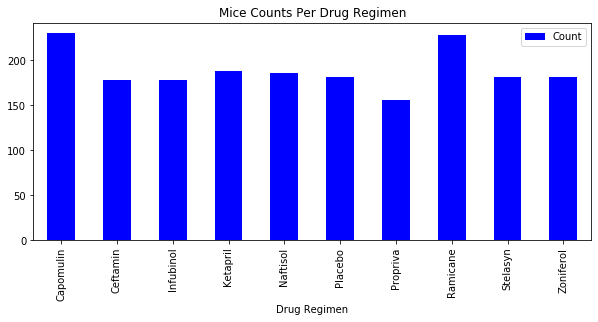

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.  
grouped_df = pd.DataFrame(mouse_data_clean.groupby(["Drug Regimen"]).count()).reset_index()
regimen_data_pnts = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_data_pnts = regimen_data_pnts.rename(columns={"Mouse ID": "Count"})
regimen_data_pnts = regimen_data_pnts.set_index("Drug Regimen")    


# Use DataFrame.plot() in order to create a bar chart of the data
regimen_data_pnts.plot(kind="bar", color="blue", figsize=(10,4))

# Set a title for the chart
plt.title("Mice Counts Per Drug Regimen")
plt.show()
plt.tight_layout()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# select column to convert to list here
drug_regimens = summary_df.index.tolist()
drug_regimens


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

<BarContainer object of 10 artists>

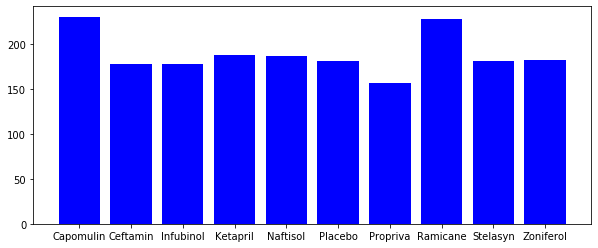

In [11]:
# Convert regimen count into a list
regimen_cnts = (mouse_data_clean.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
regimen_cnts

x_axis = np.arange(len(regimen_cnts))

# Define x-axis
x_axis = drug_regimens

# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_cnts, color='b', alpha=1, align="center")


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(mouse_data_clean.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,930,930,930,930,930,930,930
1,Male,958,958,958,958,958,958,958


In [13]:
# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,930
1,Male,958


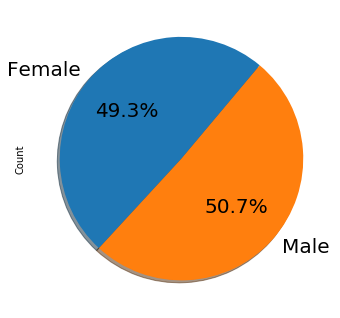

In [14]:
# plot chart
plt.figure(figsize=(12,8))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=50, shadow=True, labels=gender_df['Sex'], legend = False, fontsize=20)


In [15]:
plt.clf()
plt.cla()
plt.close()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (mouse_data_clean.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[930, 958]

In [17]:
# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

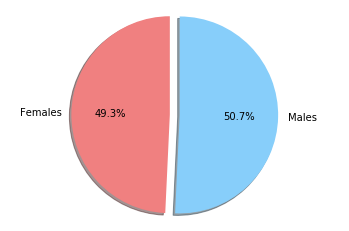

In [18]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of chart and print the final product to the terminal
plt.savefig("Images/PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_data_df = mouse_data_clean[mouse_data_clean['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
reduced_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df = reduced_data_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_max_df

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merger_df_2 = pd.merge(timepoint_max_df, reduced_data_df, on=["Mouse ID", "Timepoint"], how="left")
merger_df_2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = merger_df_2['Drug Regimen'].unique().tolist()
treatments_list.sort()
treatments_list

['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

In [23]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [25]:
# Located the rows which contain mice on each drug and get the tumor volumes
reduced_data_df_2 = merger_df_2[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
reduced_data_df_2


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [26]:
# Creating  subset with tumor volume
cap_data_df = reduced_data_df_2[reduced_data_df_2['Drug Regimen'] == "Capomulin"]
cap_data_df.sort_values('Tumor Volume (mm3)')


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
70,s185,Capomulin,23.343598
51,m601,Capomulin,28.430964
90,x401,Capomulin,28.484033
24,f966,Capomulin,30.485985
78,u364,Capomulin,31.023923
96,y793,Capomulin,31.896238
65,r554,Capomulin,32.377357
53,m957,Capomulin,33.329098
73,t565,Capomulin,34.455298
88,w914,Capomulin,36.041047


In [27]:
# Determine Capomulin outliers using upper and lower bounds
quartiles = cap_data_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_vol = cap_data_df.loc[(cap_data_df['Tumor Volume (mm3)'] < lower_bound) | (cap_data_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_vol

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


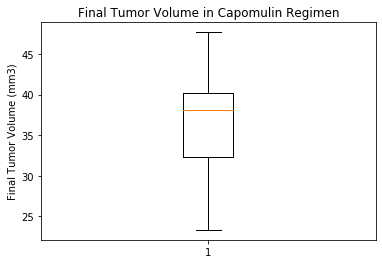

In [28]:
# Capomulin outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_data_df['Tumor Volume (mm3)'])
plt.show()

In [54]:
ram_data_df = reduced_data_df_2[reduced_data_df_2['Drug Regimen'] == "Ramicane"]
ram_data_df.sort_values('Tumor Volume (mm3)')

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
40,k403,Ramicane,22.050126
27,g791,Ramicane,29.128472
71,s508,Ramicane,30.276232
50,m546,Ramicane,30.564625
98,z578,Ramicane,30.638696
54,n364,Ramicane,31.095335
37,j913,Ramicane,31.560470
7,a644,Ramicane,32.978522
17,c758,Ramicane,33.397653
29,i177,Ramicane,33.562402


In [30]:
# Determine Ramicane outliers using upper and lower bounds
quartiles = ram_data_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_vol = ram_data_df.loc[(ram_data_df['Tumor Volume (mm3)'] < lower_bound) | (ram_data_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_vol.head()

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


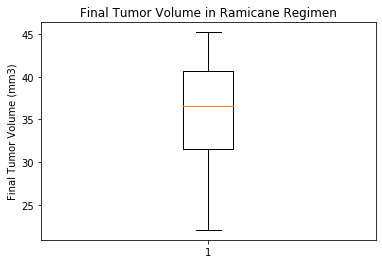

In [31]:
# Ramicane outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_data_df['Tumor Volume (mm3)'])
plt.show()

In [53]:
inf_data_df = reduced_data_df_2[reduced_data_df_2['Drug Regimen'] == "Infubinol"]
inf_data_df.sort_values('Tumor Volume (mm3)')

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
15,c326,Infubinol,36.321346
58,o813,Infubinol,45.699331
79,v339,Infubinol,46.250112
52,m756,Infubinol,47.010364
85,w193,Infubinol,50.005138
81,v766,Infubinol,51.542431
80,v719,Infubinol,54.048608
60,q132,Infubinol,54.656549
57,o809,Infubinol,55.629428
69,s121,Infubinol,55.650681


In [33]:
# Determine Infubinol outliers using upper and lower bounds
quartiles = inf_data_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_vol = inf_data_df.loc[(inf_data_df['Tumor Volume (mm3)'] < lower_bound) | (inf_data_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_vol.head()

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
15,c326,Infubinol,36.321346


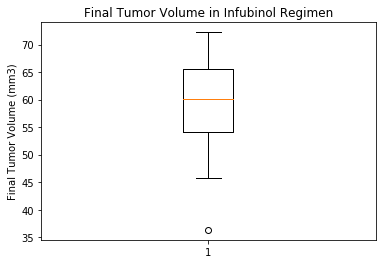

In [34]:
# Infubinol outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_data_df['Tumor Volume (mm3)'])
plt.show()

In [52]:
cef_data_df = reduced_data_df_2[reduced_data_df_2['Drug Regimen'] == "Ceftamin"]
cef_data_df.sort_values('Tumor Volume (mm3)')

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
89,x226,Ceftamin,45.000000
10,b447,Ceftamin,45.000000
76,u153,Ceftamin,45.000000
74,t573,Ceftamin,45.000000
46,l558,Ceftamin,46.784535
28,h531,Ceftamin,47.784682
23,f436,Ceftamin,48.722078
75,u149,Ceftamin,52.925348
13,b759,Ceftamin,55.742829
11,b487,Ceftamin,56.057749


In [36]:
# Determine Ceftamin outliers using upper and lower bounds
quartiles = cef_data_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
#print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor_vol = cef_data_df.loc[(cef_data_df['Tumor Volume (mm3)'] < lower_bound) | (cef_data_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor_vol.head()

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Drug Regimen,Tumor Volume (mm3)


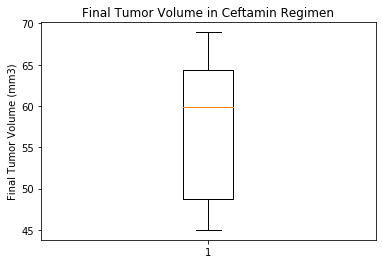

In [37]:
# Ceftamin outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_data_df['Tumor Volume (mm3)'])
plt.show()

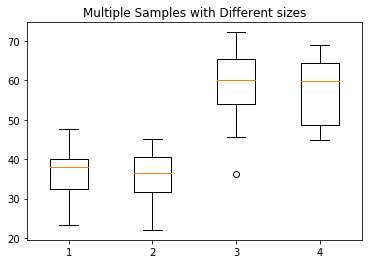

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = [cap_data_df['Tumor Volume (mm3)'], ram_data_df['Tumor Volume (mm3)'], inf_data_df['Tumor Volume (mm3)'], cef_data_df['Tumor Volume (mm3)']]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(tumor_vol)

plt.show()

## Line and Scatter Plots

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [40]:
# Create a new DataFrame that looks into Capomulin
capomulin_df = reduced_data_df.loc[reduced_data_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [49]:
# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


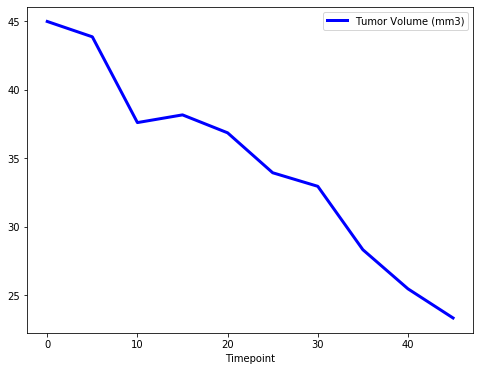

In [50]:
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(8, 6), linewidth=3, color='blue')

In [55]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [56]:
# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [57]:
# Calculate avg tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [58]:
# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [59]:
# Set the 'Mouse ID' to index
average_cap = average_cap.set_index('Mouse ID')

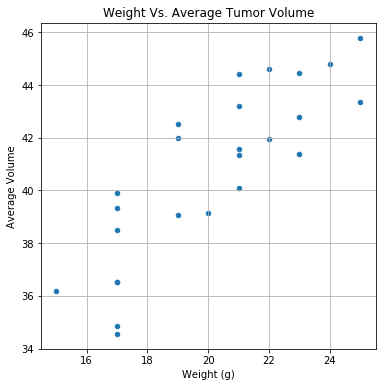

In [61]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(6,6),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation coefficient is {round(correlation[0],2)}")


The correlation coefficient is 0.84


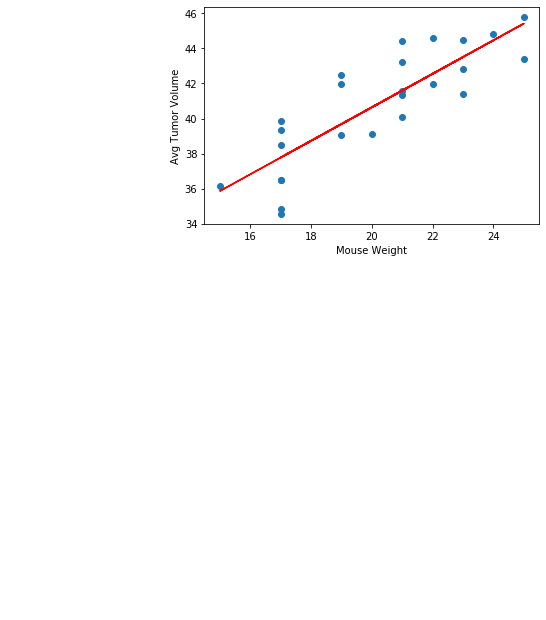

In [67]:
# Add the linear regression equation and line to plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()